# The hidden cut algorithm for locating unentanglement

One of the most interesting and counterintuitive features of quantum physics is entanglement.
Entanglement is a form of correlation between quantum systems that is fundamentally different from any form of correlation that can exist between classical systems.
To define entanglement, consider a quantum state $\ket{\psi}$ describing a system with two parts, $A$ and $B$.
For example $A$ and $B$ might each be single qubits in which case $\ket{\psi}$ is a two qubit state.
$A$ and $B$ are *unentangled* or *separable* if $\ket{\psi}$ can be written as
$$
\ket{\psi} = \ket{\psi_A}\otimes \ket{\psi_B}
$$,
where $\ket{\psi_A}$ is a state of system $A$ and $\ket{\psi_B}$ is a state of system $B$.
If $\ket{\psi}$ can't be written in this form then $A$ and $B$ are entangled.

Now imagine we're given a system of $n$ qubits instead of just two.
We're told that it's possible to split the $n$ qubits into two subsets, call them $S$ and $\bar S$, so that these two subsets are unentangled.
In other words the n-qubit state $\ket{\psi}$ can be written as
$$
\ket{\psi} = \ket{\psi_S}\otimes \ket{\psi_{\bar S}}
$$
for some $S$ and $\bar S$, but we aren't told what $S$ and $\bar S$ are.
The problem that we're given is to determine $S$ and $\bar S$, that is to determine the ``cut'' of the qubits into two unentangled pieces.
In this demo, following ..., we'll develop a quantum algorithm that solves this problem!

## Separable state

Let's start by creating a separable state with $n=5$ qubits.
We'll set qubits $S=\{0,3\}$ to be in a random pure state and qubits $\bar S=\{1,2,4\}$ to be in a random pure state, so that the two sets of qubits are unentangled with each other.

In [ ]:
import numpy as np
from scipy.stats import unitary_group

def random_state(n_qubits):
    dim = 2**n_qubits
    return unitary_group.rvs(dim)[0]

def separable_state(partitions):
    # Number of qubits
    n_qubits = sum(len(part) for part in partitions)

    # Sort partitions
    partitions = [sorted(part) for part in partitions]

    # Create random state for each partition
    partition_states = [(part, random_state(len(part))) for part in partitions]
    
    # Initialize full state
    full_state = np.zeros(2**n_qubits, dtype=complex)
    
    # Fill in amplitudes
    for idx in range(2**n_qubits):
        # Convert idx to binary string
        bits = format(idx, f'0{n_qubits}b')
        
        # Calculate amplitude as product of partition amplitudes
        amplitude = 1.0
        for part, state in partition_states:
            # Extract partition bits, convert to decimal, update amplitude
            part_bits = ''.join(bits[n_qubits-1-q] for q in part)
            part_idx = int(part_bits, 2)
            amplitude *= state[part_idx]
        
        full_state[idx] = amplitude
    
    return full_state

# create 5 qubit state
state = separable_state([(0,3), (1,2,4)])

array([ 0.05104179+0.0768874j ,  0.14573223+0.05676977j,
       -0.02354117+0.15181157j,  0.11545076+0.233352j  ,
        0.00194962+0.11960138j,  0.11936   +0.16384958j,
       -0.1131419 -0.0587655j , -0.21411859+0.02891661j,
        0.16545246-0.00938228j, -0.07068761+0.06361661j,
        0.21393898+0.17415643j, -0.15830249-0.00112338j,
        0.18713396+0.10543924j, -0.12162686+0.02000843j,
       -0.19368165+0.12206295j,  0.04285733-0.12419041j,
       -0.0698666 +0.09858457j, -0.0006671 +0.20477203j,
       -0.0711748 -0.03430414j, -0.13209853+0.02188239j,
        0.13602099+0.02532102j,  0.21320445-0.09758215j,
        0.13686031+0.03430691j,  0.22313239-0.0859476j ,
        0.08943398+0.19768549j, -0.11102345-0.05636713j,
       -0.11771187+0.07920249j,  0.02424504-0.07772378j,
        0.16259521-0.18785167j, -0.005317  +0.14247389j,
        0.17728326-0.18100362j, -0.01435067+0.14468343j])

In [ ]:
# verify that state is separable by plotting all purities

# how do we find hidden cut? 

# one way would be compute purities of all subsytems and see which subsystem has purity = 1. But this is impractical since there are exponentially many subsystems

# let's look at subsystem purity function more closely - colour in bars that are the same height the same colour.

# how are bars of the same height related? by adding eg (10100) and (01011).

# ie pi(s) = pi(s + 10100) + pi(s + 01011) + pi(s + 11111).

# ie the symmetry is generated by the group H = ...

# H is a subgroup of the full group G = {00000, 00001, ...} with the group operation being bitwise addition modulo 2.

# Notice that H has 4 elements but it can be "generated" by ... and ..., meaning that the other elements (... and ...) can be obtained via the two generators and the group operation.

# do you notice anything interesting about the generators? they directly encode the separable components of the state!

# so in order to find the separable components of the state, we just have to find the symmetry subgroup of the purity function pi(s), and look at its generators.

# this is an example of a "hidden subgroup problem" a very important class of problems that quantum computers can solve efficiently. 

# Notice that it wasnt at all obvious that our problem of finding the separable components of a state was a hidden subgroup problem; we needed to think a bit to frame it in this way. In fact the same is true for the most famous problem solveable by quantum computers: factoring large integers. At first this doesn't look anything like a hidden subgroup problem, but as Peter Shor showed with some clever math it can be phrased as one, and can therefore be solved by the general quantum circuit for hidden subgroup problems.

# We'd like to use this quantum circuit to solve our "hidden cut" problem. So how does the HSP quantum circuit look?

# Suppose we want to find the hidden symmetry subgroup of a function f(s) over n-bit strings s. we start with two n-qubit registers initialized in the all |0> states. 
# the first step is to apply a Hadamard to each qubit in the first register to create a uniform superposition sum |s>.
# the second step assumes that we have access to a unitary U_f that maps |s>|0> to |s>|f(s)>, such that |f(s)> and |f(s')> are equal if f(s) = f(s') and orthogonal if f(s) != f(s').
# the final step is to again apply Hadamards to the first register, and measure this register.
# the circuit looks like:

# The crucial feature of this circuit is that the measurement outcomes are guaranteed to be orthogonal to the hidden subgroup bitstrings (ie the bitstrings defining the symmetry of f(s)).
# for example if we get a measurement outcome ..., then a hidden subgroup element might be ... because ..., but ... is definitely not in the hidden subgroup, because ....
# Therefore by obtaining measurment outcomes and finding the bitstrings orthogonal to all measurments, we will identify the hidden symmetry of f.

# Now let's apply this to solve the hidden cut problem for the state psi. Remember that here the function f(s) is pi(s), the purity of psi's subsystems.
# We immediately run into a problem however. Unlike in the basic HSP problem, we arent provided with a unitary mapping |s>|0> to |s>|pi(s)>.
# So what do we do? Let's create the unitary!

# Recall the key property that the unitary is supposed to have: |f(s)> and |f(s')> should be equal if f(s) = f(s') and orthogonal if f(s) != f(s').
# Consider the controlled swap unitary, mapping |s>|psi>|psi> to |s>SWAP_s(|psi>|psi>), where s denotes the qubits to be swapped between the two copies of |psi>

# Let's check if the controlled swap unitary has the desired properties.
# First, if pi(s) = pi(s') we want SWAP_s(|psi>|psi>) to equal SWAP_s(|psi>|psi>). 
# Let's consider an example. We see from our plot of pi(s) that ... and ... have the same value of pi.
# Let's check the inner product of SWAP_s(|psi>|psi>) and SWAP_s'(|psi>|psi>):

# Since the inner product is 1, the SWAP_s(|psi>|psi>) and SWAP_s'(|psi>|psi>) must be identical.

# Now let's check whether pi(s) != pi(s') implies SWAP_s(|psi>|psi>) and SWAP_s'(|psi>|psi>)...

# So it turns out that SWAP_s(|psi>|psi>) and SWAP_s'(|psi>|psi>) are not orthogonal and so the SWAP_s unitary does not satisfy the second requirement for the unitary in the HSP circuit.

# Even though we don't expect it to work, let's nevertheless try running the HSP circuit with the SWAP_s unitary, and see what happens.

# ...10 samples

# Remember the final postprocessing step to solving an HSP via a quantum computer: we have to determine the bitstrings orthogonal to the measurement outcomes, where two bitstrings s and t are orthogonal if s.t = 0 modulo 2. This is a basic linear algebra problem that amounts to finding the nullspace of the matrix of measurement outcomes over the finite field GF(2).

# But by being clever we can avoid doing any linear algebra.

# Look at the allowed measurement outcomes very carefully. Do you notice anything in common between them?

# The answer: they are exactly those bitstrings that have an even number of 1s in positions ... *and* an even number of 1s in positions ...

# This means that the only bitstrings orthogonal to the allowed measurement outcomes are the all 0 bitstring, the all 1 bitstring, the bitstring ... and the bitstring ...

# This is exactly the hidden subgroup generated by ... and ..., where the generators encode the separable components ... and ... of the original state |psi>.

# Therefore the HSP circuit with the SWAP_s unitary finds the separable components!

# Let's check it with another state to make sure we didn't just get lucky.

# This time let's consider a 4 qubit state ...


# again it works!

# So we have solved the hidden cut problem by rephrasing it as an HSP and using the unitary SWAP_s.

# but why does this work? Recall that in the standard quantum circuit for HSP we need |f(s)> and |f(s')> should be equal if f(s) = f(s') and orthogonal if f(s) != f(s'). However in our case f(s) is the purity function pi(s), and we set |pi(s)> = SWAP_s(|psi>|psi>). We saw above that this satisfies the equality requirement, but not the orthogonality requirement. Namely pi(s) != pi(s') doesn't generally imply that |pi(s)> and |pi(s')> are orthogonal.

# To understand why our circuit worked despite this non-orthogonality, let's think about how we could have defined |pi(s)> differently so that the orthogonality requirement *was* satisfied.
# This is actually quite straightforward: just define |pi(s)> = [SWAP_s(|psi>|psi>)]^t for some large t. 
# Then as long as the inner product between SWAP_s(|psi>|psi>) and SWAP_s(|psi>|psi>) is not 1 (ie they aren't identical), the inner product between |pi(s)> and |pi(s')> will be effectively 0 (exponentially approach 0 as t increases).

# So if instead of using only 1 pair |psi>|psi> in our quantum circuit we used t pairs, for large enough t this would've exactly functioned like a standard issue HSP circuit.

# Unfortunately the circuit with t pairs of |psi>|psi> requires (1 + 2t) * n qubits (the 1 is for the control register and the 2t for the 2t pairs of |psi>|psi>), so simulating this with n=4 is not feasible for t > 2.

# With that in mind let's look consider the circuit with t=2 and compare with what we got above with t=1. Hopefully we'll see something interesting that we can extrapolate to t -> inf.

# ...

# plot probs histograms

# we notice that the same measurement outcomes are allowed, and only their probabilities differ.

# in particular the distribution is more skewed towards outcomes with fewer 1s for t=1, and more uniform for t=2

# we can conjecture that this trend continues for larger t: the allowed outcomes remain the same as in the t=1 case, but the distribution becomes more and more uniform.

# in fact this it can be proven analytically that this conjecture is correct, and if we had a powerful enough simulator (or a quantum computer), we'd be able to verify this.

# So now we can understand why our hidden cut circuit with only 1 pair of |psi>s worked, when naively we didn't expect it to. It is because the allowed measurement outcomes from the output of this t=1 circuit are exactly the allowed measurmenet outcomes from the t-> infty circuit. Because the outcome of the final postprocessing step of the quantum HSP algorithm only depends on the allowed measurement outcomes and not on their probabilities, the t=1 algorithm is able to get the same outcome as the large t algorithm. 

# So should we use small t or large t?

# do sample efficiency experiment. Expect result to be: use large t if you can because it's more sample efficient. 



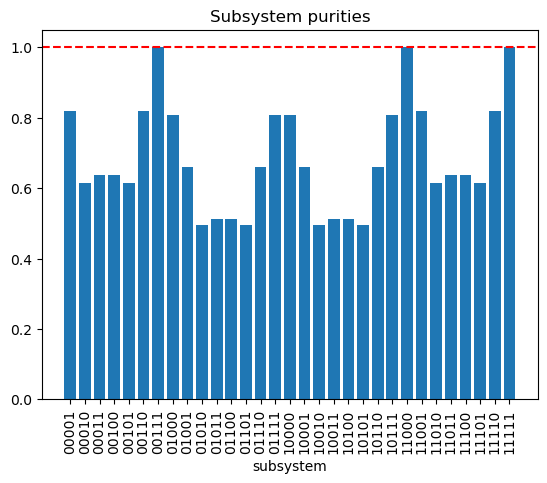

In [75]:
def random_state(dim):
    return unitary_group.rvs(dim)[0]

def separable_state(*sizes):
    state = np.array([1])
    for n in sizes:
        component = random_state(2**n)
        state = np.kron(state, component)
    return state

state = separable_state(2, 3)
n = int(np.log2(len(state)))

dev = qml.device('default.qubit')

@qml.qnode(dev)
def purity(state, qubits):
    qml.StatePrep(state, wires=range(n))
    return qml.purity(wires=qubits)

# p = purity(state, qubits=[0,1])

@qml.qnode(dev)
def density_matrix(state, qubits):
    qml.StatePrep(state, wires=range(n))
    return qml.density_matrix(qubits)

# rho = density_matrix(state, [0,1])
# np.trace(rho @ rho).round(5).item()

bitstrings = []
purities = []

for x in range(1, len(state)):
    bitstring = [int(bit) for bit in bin(x)[2:].zfill(n)]
    subsystem = [i for i in range(n) if bitstring[i] == 1]
    bitstrings.append(''.join(str(bit) for bit in bitstring))
    purities.append(purity(state, subsystem))

plt.bar(bitstrings, purities)
plt.xticks(rotation=90)
plt.axhline(y=1.0, color='r', ls='--')
plt.xlabel('subsystem')
plt.title('Subsystem purities')
plt.show()

In [205]:

def hidden_cut_circuit(state, n_copies=1):

    n = int(np.log2(len(state)))
    n_qubits = (2 * n_copies + 1) * n
    dev = qml.device('lightning.qubit', wires=n_qubits)

    @qml.qnode(dev)
    def _circuit():
        # Create copies of state
        for pair in range(n_copies):
            for copy in range(2):
                offset = n + 2 * n * pair + n * copy
                qml.StatePrep(state, wires=range(offset, offset + n))
                                
        # Hadamard transform
        for wire in range(n):
            qml.Hadamard(wires=wire)

        # Controlled swaps
        for c in range(n):
            for pair in range(n_copies):
                a = c + n + 2*n*pair
                b = c + n + 2*n*pair + n
                qml.ctrl(qml.SWAP, c, control_values=1)(wires=(a,b))

        # Hadamard transform
        for wire in range(0, n):
            qml.Hadamard(wires=wire)

        # Return probs of first register
        return qml.probs(wires=range(n))

    return _circuit()
    
probs = hidden_cut_circuit(state, n_copies=1)
bitstrings = [bin(x)[2:].zfill(n) for x in range(2**n)]

# plt.bar(bitstrings, probs)
# plt.xticks(rotation=90)
# plt.show()

# np.random.choice(len(probs), size=100, p=probs)

In [219]:
dev = qml.device('lightning.qubit', shots=10, wires=[0])
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.Snapshot('tag', qml.state())
    # return qml.state()
    return qml.probs()

qml.snapshots(circuit)()

/Users/petar.simidzija/miniconda3/envs/qml/lib/python3.11/site-packages/pennylane/debugging/snapshot.py:243: UserWarning: Snapshots are not supported for the given device. Therefore, a tape will be created for each snapshot, resulting in a total of n_snapshots + 1 executions.
  warnings.warn(


DeviceError: Measurement state(wires=[]) not accepted with finite shots on lightning.qubit